In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
from sklearn.datasets import fetch_openml

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.utils import check_random_state
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.preprocessing import normalize
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from utils import *

%load_ext autoreload
%autoreload 2

In [65]:
def getSupportVectors(model, num_samples=5, imSize=28, num_classes=2):
    examples = np.zeros((num_samples * num_classes, imSize * imSize))
    
    for i in range(num_classes):
        examples[i * num_samples: i * num_samples + num_samples] = model.support_vectors_[ 
            np.sum(model.n_support_[:i]) : np.sum(model.n_support_[:i]) + num_samples]
        
    return examples


def drawDistribution(x, y, num_features, support_vectors):
    x = x[y < 2]
    y = y[y < 2]
    
    plt.figure(figsize=(18, 18), dpi=100)
    
    for x_ in range(num_features):
        for y_ in range(num_features):
            plt.subplot(num_features, num_features, 1 + x_ * num_features + y_)
            if (x_ != y_):
                plt.scatter(x[:, x_], x[:, y_], c= list(map(int, y)), s=20, 
                            edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('nipy_spectral', 20))
               
    for x_ in range(num_features):
        for y_ in range(num_features):
            if (x_ != y_):
                plt.subplot(num_features, num_features, 1 + x_ * num_features + y_)
                plt.scatter(support_vectors[:, x_], support_vectors[:, y_], c='r', marker='x')

In [39]:
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
y = y.astype(np.int)

# SVM

Without normalization:

In [12]:
param_distrs = { 'C': uniform(1e-1, 1e1), 'tol': uniform(1e-4, 1e-3), 'class_weight':['balanced', None] }

params_searcher = RandomizedSearchCV(SVC(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'C': 5.588135039273247, 'class_weight': None, 'tol': 0.0009442657485810174}
best accuracy: 0.9728


accuracy: 0.9866


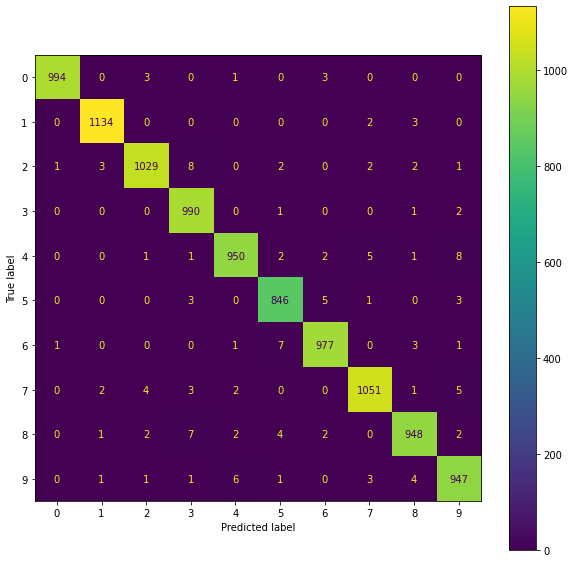

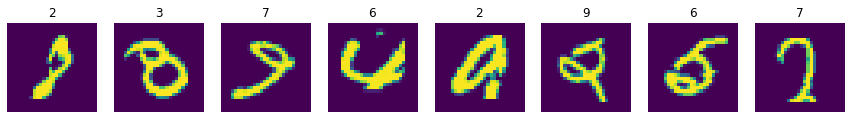

In [13]:
best_classifier = SVC(C=best_params['C'], tol=best_params['tol'], class_weight=best_params['class_weight'])
pipeline = make_pipeline(PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

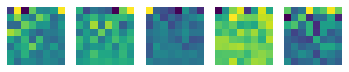

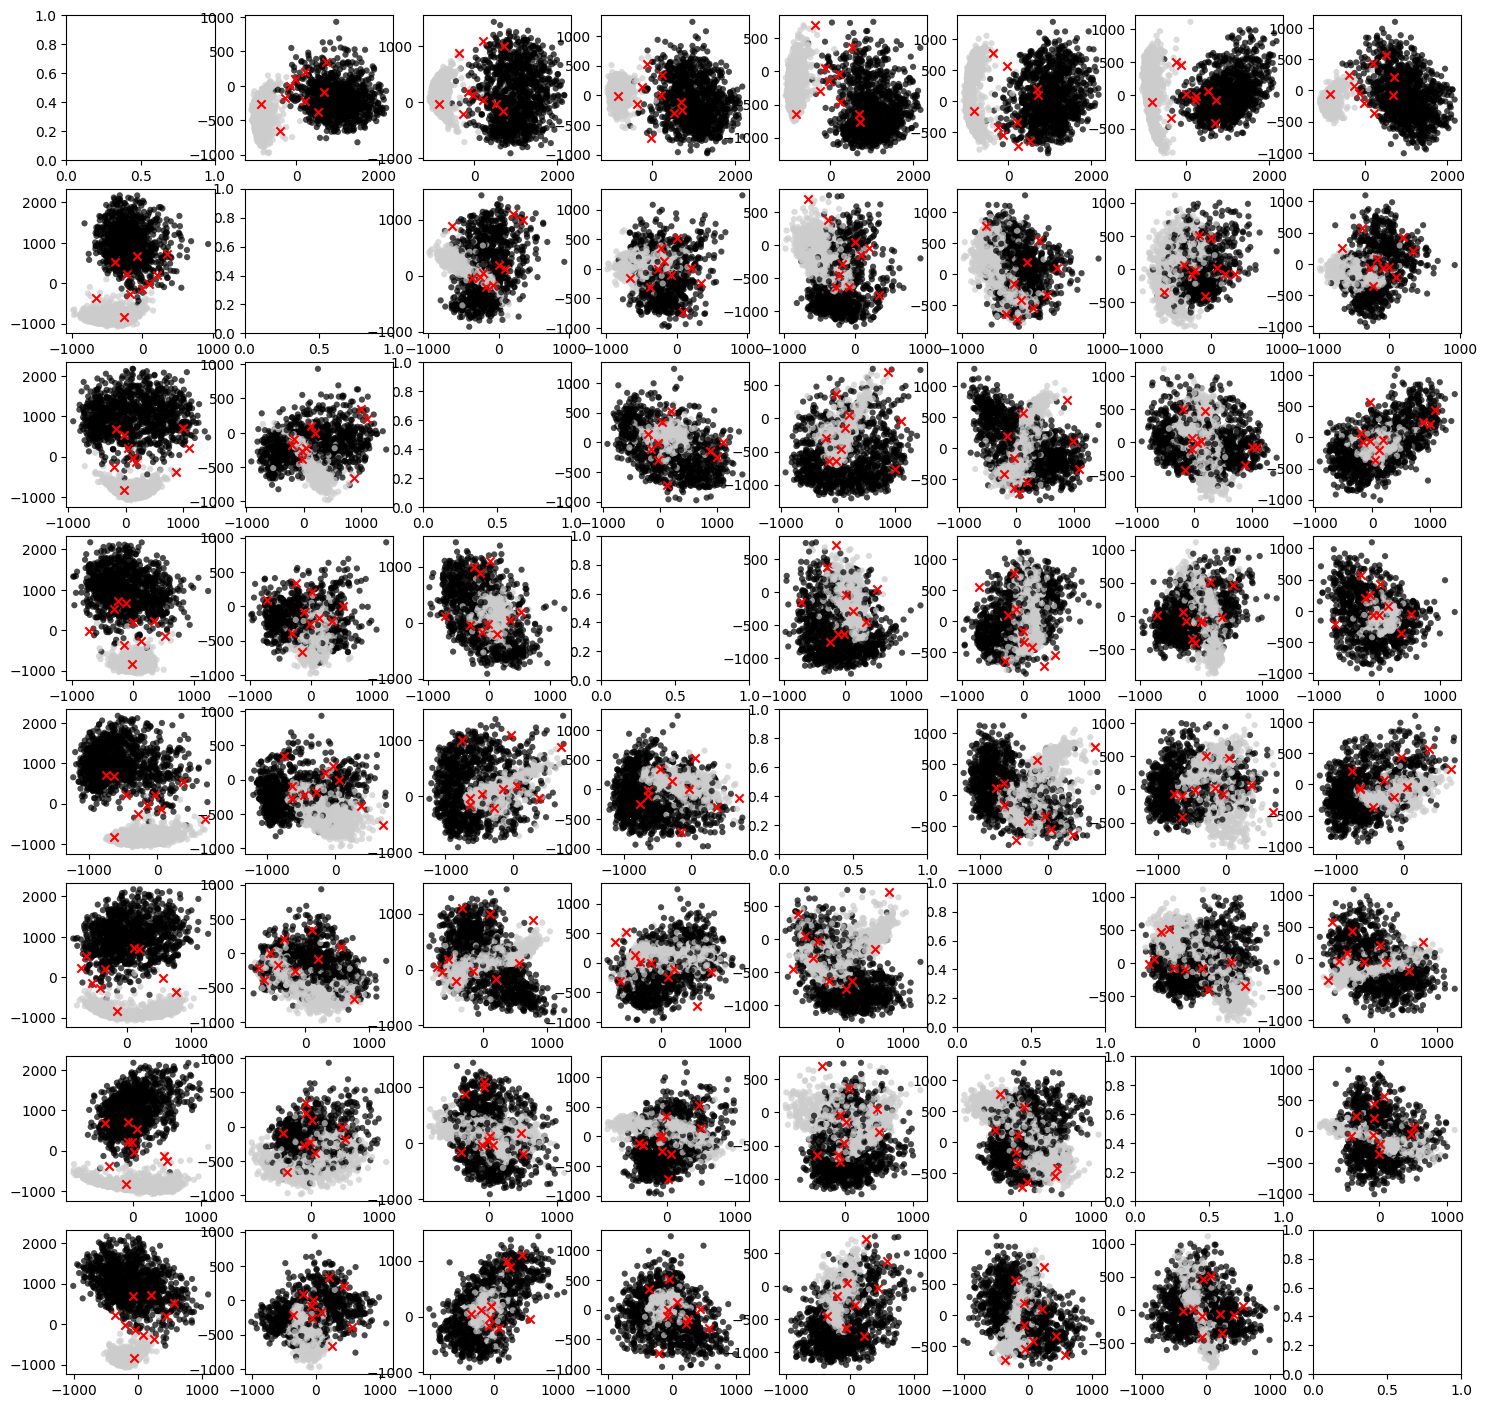

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000, random_state=0)

pca = PCA(n_components = 64)
x_train_pc = pca.fit_transform(x_train, y_train)
x_test_pc = pca.transform(x_test)

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(np.reshape(x_train_pc[i], (8, 8)))

drawDistribution(x_test_pc.astype(np.int), y_test, 8, support_vectors=getSupportVectors(best_classifier, 5, 8))

# KNN

Without normalization:

In [16]:
param_distrs = { 'n_neighbors': np.arange(11) }

params_searcher = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'n_neighbors': 1}
best accuracy: 0.9560000000000001


accuracy: 0.9756


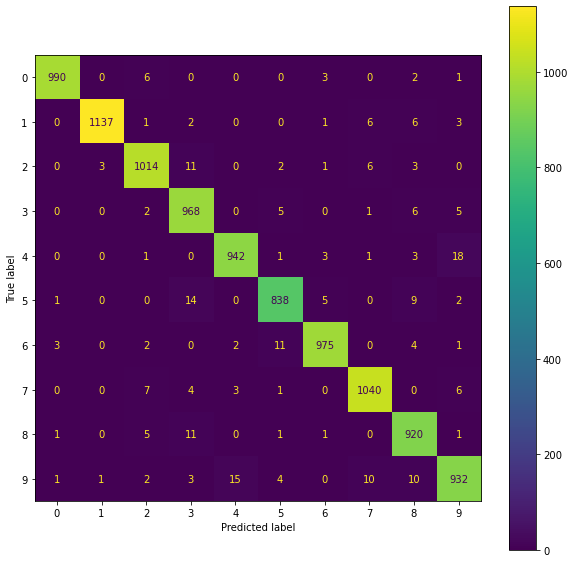

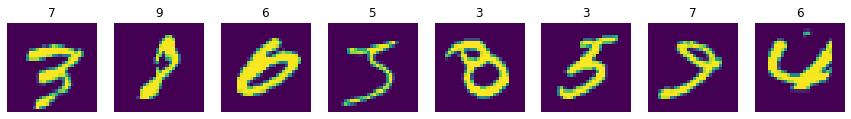

In [17]:
best_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
pipeline = make_pipeline(PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

 SVM 

Normalizer

In [18]:
param_distrs = { 'n_neighbors': np.arange(11) }

params_searcher = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(Normalizer(), PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'n_neighbors': 3}
best accuracy: 0.9625333333333334


accuracy: 0.9797


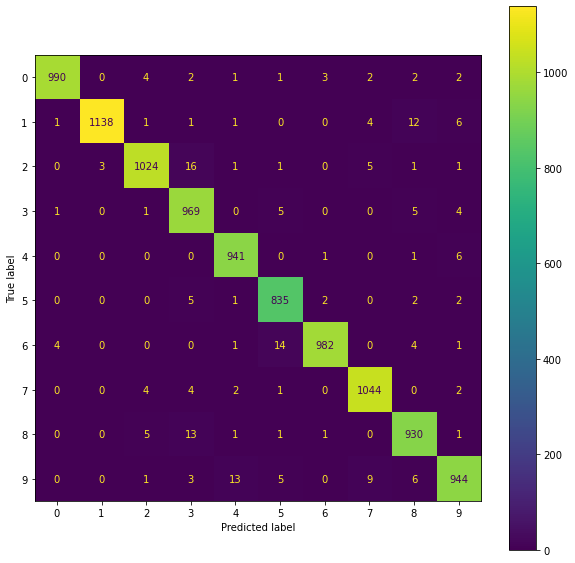

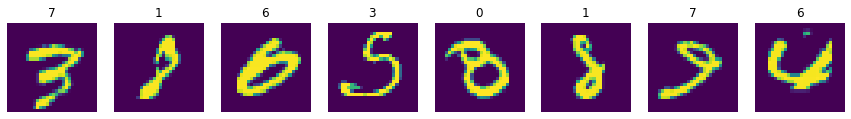

In [19]:
best_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
pipeline = make_pipeline(Normalizer(), PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

Standard Scaler:

In [20]:
param_distrs = { 'n_neighbors': np.arange(11) }

params_searcher = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'n_neighbors': 4}
best accuracy: 0.9303333333333333


accuracy: 0.9592


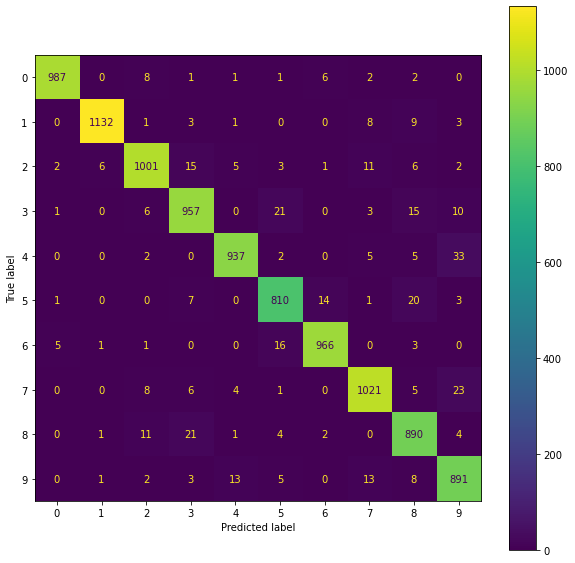

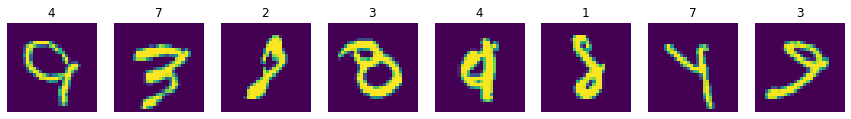

In [21]:
best_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
pipeline = make_pipeline(StandardScaler(), PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

Normalizer:

In [9]:
param_distrs = { 'C': uniform(1e-1, 1e1), 'tol': uniform(1e-4, 1e-3), 'class_weight':['balanced', None] }

params_searcher = RandomizedSearchCV(SVC(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(Normalizer(), PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'C': 8.679456176227568, 'class_weight': None, 'tol': 0.0005236547993389048}
best accuracy: 0.9752666666666666


accuracy: 0.9863


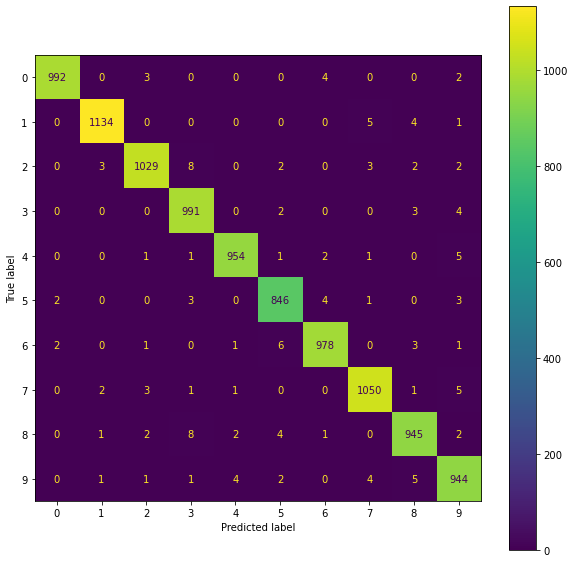

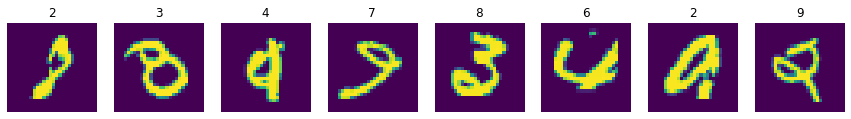

In [10]:
best_classifier = SVC(C=best_params['C'], tol=best_params['tol'], class_weight=best_params['class_weight'])
pipeline = make_pipeline(Normalizer(), PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

Standard Scaler:

In [15]:
param_distrs = { 'C': uniform(1e-1, 1e1), 'tol': uniform(1e-4, 1e-3), 'class_weight':['balanced', None] }

params_searcher = RandomizedSearchCV(SVC(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'C': 5.588135039273247, 'class_weight': None, 'tol': 0.0009442657485810174}
best accuracy: 0.957


accuracy: 0.9764


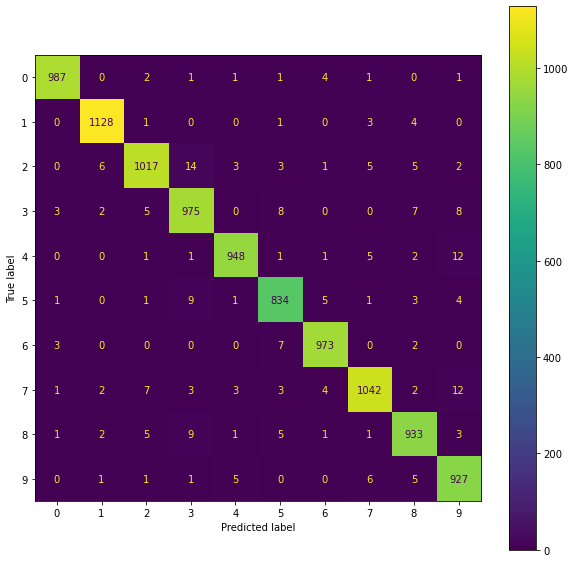

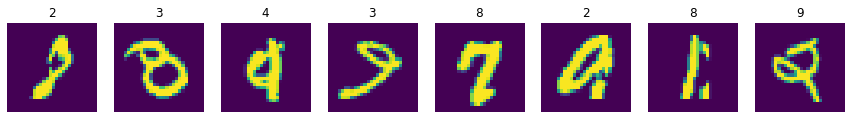

In [13]:
best_classifier = SVC(C=best_params['C'], tol=best_params['tol'],
                                         class_weight=best_params['class_weight'])
pipeline = make_pipeline(StandardScaler(), PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

# Decision Tree

Without normalization:

In [16]:
param_distrs = { 'max_depth': np.arange(50) }

params_searcher = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'max_depth': 41}
best accuracy: 0.7739333333333334


accuracy: 0.8403


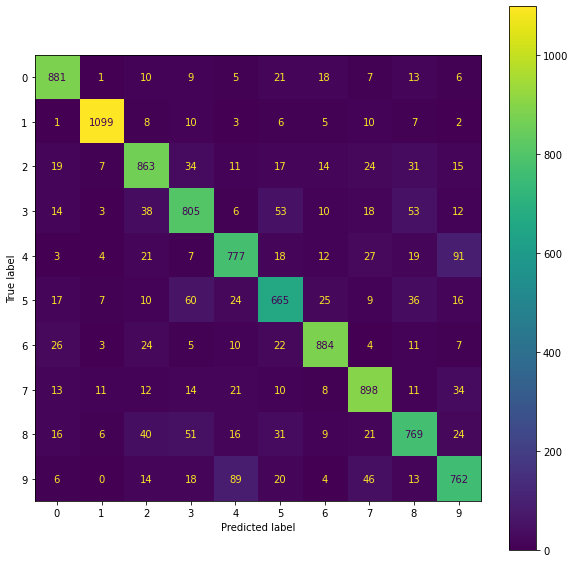

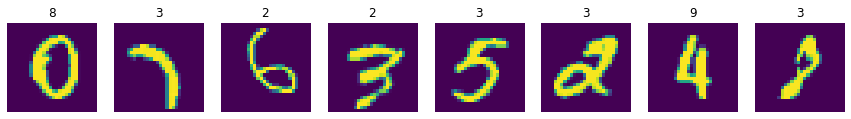

In [19]:
best_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'])
pipeline = make_pipeline(PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

Normalizer:

In [20]:
param_distrs = { 'max_depth': np.arange(50) }

params_searcher = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(Normalizer(), PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'max_depth': 11}
best accuracy: 0.7956


accuracy: 0.8373


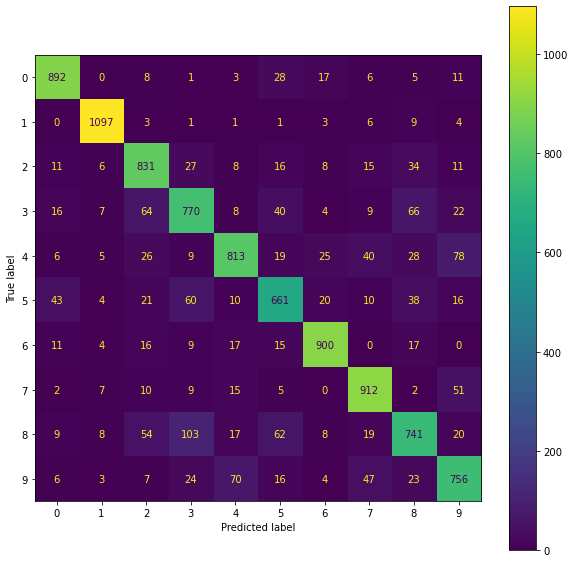

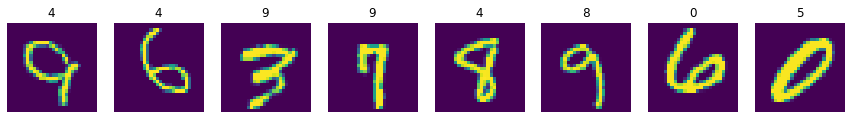

In [21]:
best_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'])
pipeline = make_pipeline(Normalizer(), PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

Standard Scaler:

In [22]:
param_distrs = { 'max_depth': np.arange(50) }

params_searcher = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'max_depth': 11}
best accuracy: 0.7764000000000001


accuracy: 0.8214


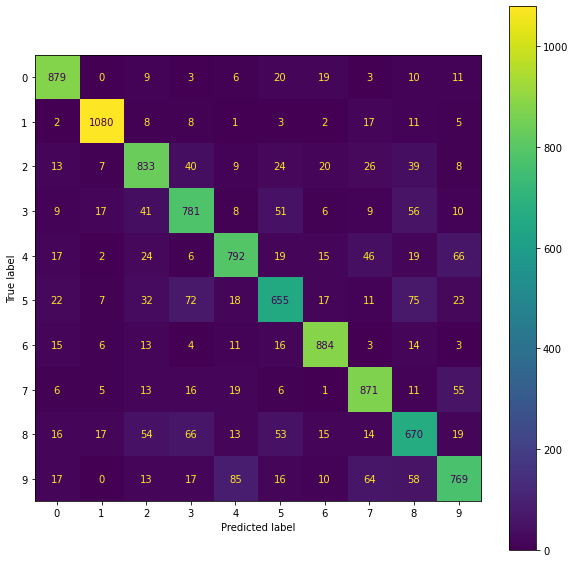

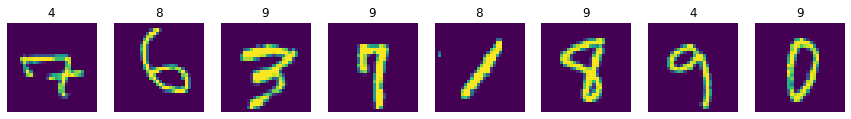

In [23]:
best_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'])
pipeline = make_pipeline(StandardScaler(), PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

# Logistic regression

l2 reg:

In [12]:
param_distrs = param_distrs = { 'C': uniform(1e-1, 1e1), 'tol': uniform(1e-4, 1e-3), 'class_weight':['balanced', None] }

params_searcher = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distrs,
                               scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'C': 4.027847961008297, 'class_weight': None, 'tol': 0.00017103605819788695}
best accuracy: 0.8977333333333334


C:\Users\aamar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\aamar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9048


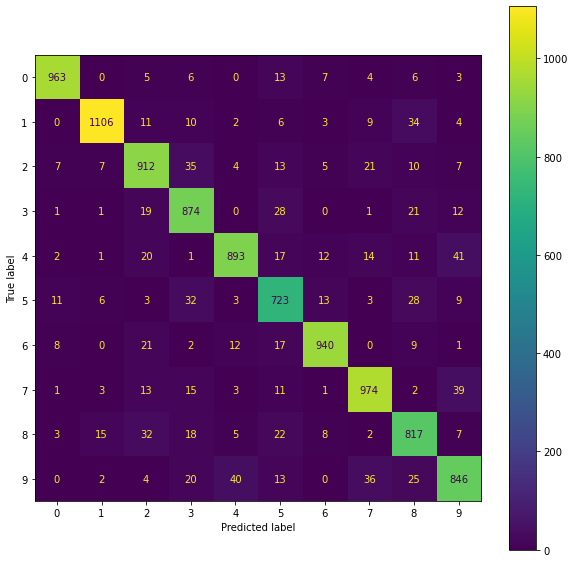

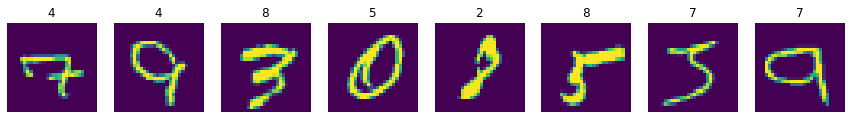

In [13]:
best_classifier = LogisticRegression(C=best_params['C'], tol=best_params['tol'],
                                         class_weight=best_params['class_weight'])
pipeline = make_pipeline(PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)

l1 reg:

In [14]:
param_distrs = param_distrs = { 'C': uniform(1e-1, 1e1), 'tol': uniform(1e-4, 1e-3), 'class_weight':['balanced', None] }

params_searcher = RandomizedSearchCV(
    LogisticRegression(solver='liblinear', penalty='l1'),
    param_distributions=param_distrs,scoring="accuracy", cv=3, n_jobs=-1, random_state=0)

pipeline = make_pipeline(PCA(n_components=64, random_state=0), params_searcher)
best_params = search_hyperparams(pipeline, X, y, train_size=15000, test_size=5000)

best params: {'C': 6.558941130666561, 'class_weight': 'balanced', 'tol': 0.00039753460654447226}
best accuracy: 0.8966


accuracy: 0.8981


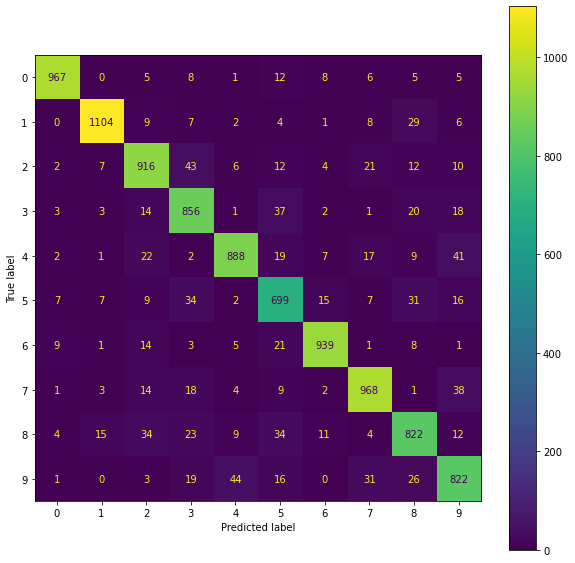

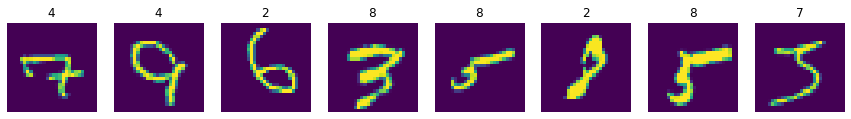

In [15]:
best_classifier = LogisticRegression(solver='liblinear', penalty='l1', C=best_params['C'],
                                     tol=best_params['tol'],class_weight=best_params['class_weight'])
pipeline = make_pipeline(PCA(n_components=64), best_classifier)
test_classifier(pipeline, X, y, train_size=60000, test_size=10000)